Syncronize 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from symbol_sync import symsync_lgc
from carr_sync import carrsync_dds_lgc as cs

In [130]:
pi = np.pi
f = np.fromfile(open("baseband_0Hz.dat"), dtype=np.complex64)
bsbnd =  f

In [133]:
print(len(bsbnd))

1035092


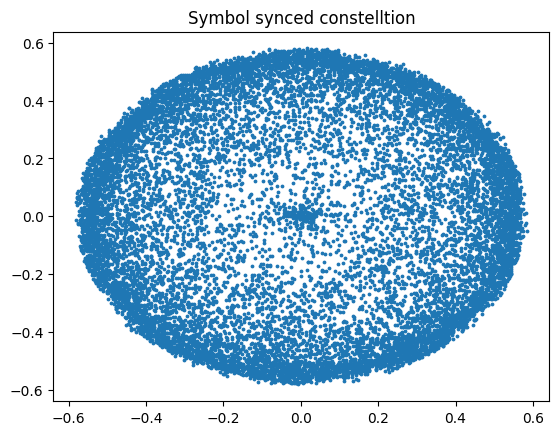

In [137]:
#symbol syncronize using symsync
ssamp, ev = symsync_lgc(bsbnd, 0.013, 0.707, 64) 

plt.scatter(np.imag(ssamp[1:]), np.real(ssamp[1:]), s=3)
plt.title("Symbol synced constelltion")
plt.show()


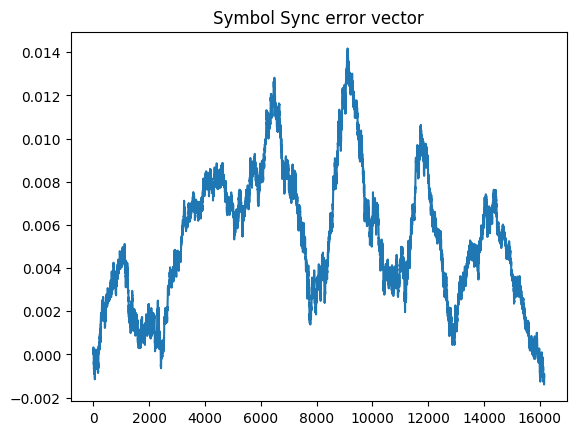

In [138]:
plt.plot(ev)
plt.title("Symbol Sync error vector")
plt.show()

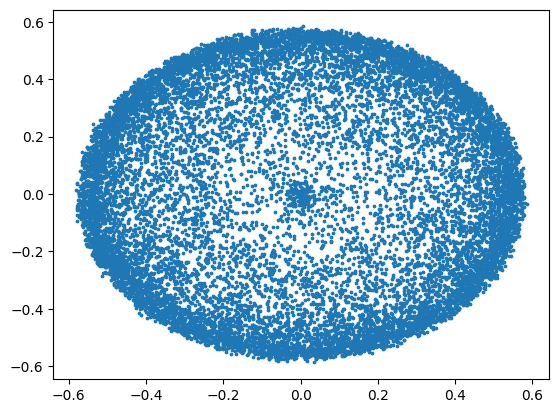

In [139]:
#carrier phase syncronize using carrsync

csync, pherr, errv_cs = cs(ssamp, 0.1, 0.707, 1)

plt.scatter(np.real(csync[1:]), np.imag(csync[1:]), s=3)
plt.show()

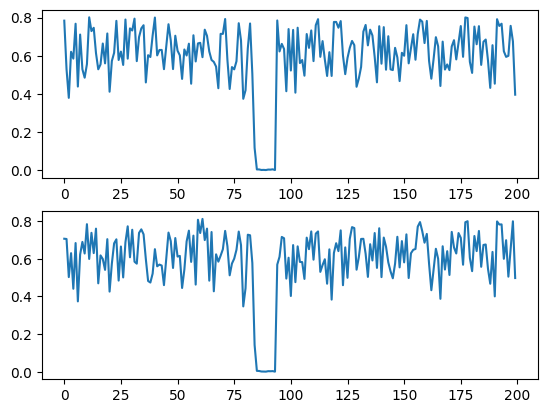

In [140]:
plt.subplot(211)
plt.plot(abs(np.real(csync[1000:1200])) + abs(np.imag(csync[1000:1200])))
plt.subplot(212)
plt.plot(abs(np.real(ssamp[1000:1200])) + abs(np.imag(ssamp[1000:1200])))
plt.show()


In [141]:
x_int = np.arange(0,8,1) # 0 to 3
x_degrees = x_int * 360//8 + 45/2  # //calculate phase shift degrees for each symbol
x_radians = x_degrees * np.pi / 180.0  # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j * np.sin(x_radians)  # this produces our PSK complex symbols

def ed2d(x, y):
    return np.max([(abs((np.real(x) - np.real(y)))) , (abs((np.imag(x) - np.imag(y))))])

def min_ed(arr, x): #find euclidian distance between input array(arr) and value x
    dests = []
    for i in range(len(arr)):
        dests = np.append(dests, ed2d(arr[i], x))
    return np.min(dests), np.argmin(dests)